In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
from keras import layers
from keras import models
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split


In [2]:
# ! kaggle datasets download -d uciml/autompg-dataset

In [3]:
# ! unzip '/content/autompg-dataset.zip'

In [35]:
df = pd.read_csv('/content/auto-mpg.csv')
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [36]:
df = df[['mpg',	'cylinders',	'displacement',	'weight',	'acceleration',	'model year',	'origin',	'car name']]



In [37]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [38]:
# Normalizing

df['cylinders'] = df['cylinders']/df['cylinders'].max()
df['displacement'] = df['displacement']/df['displacement'].max()
df['weight'] = df['weight']/df['weight'].max()
df['acceleration'] = df['acceleration']/df['acceleration'].max()
df['model year'] = df['model year']/df['model year'].max()
df['origin'] = df['origin']/df['origin'].max()


In [39]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [40]:
sum(df.duplicated())

0

In [41]:
# X = np.asarray(X).astype(np.float32)


x = np.array(df.iloc[:,1:-1]).astype(np.float32)

y = np.array(df.iloc[:,0]).astype(np.float32)




x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)



In [42]:
x_test.shape, x_train.shape

((80, 6), (318, 6))

In [43]:
y_test.shape

(80,)

In [44]:
y_train

array([32. , 28. , 21.6, 15. , 17. , 26. , 18.1, 32.4, 38.1, 17.6, 20.2,
       33.5, 26. , 20. , 31. , 19. , 35.7, 19. , 32.3, 38. , 21. , 19.2,
       26. , 21.5, 18. , 16.9, 24. , 18.5, 22. , 16.5, 31. , 20.3, 28. ,
       37.7, 20. , 14. , 24.2, 25. , 17. , 19. , 11. , 28. , 15. , 44.3,
       31. , 30. , 22. , 23. , 18. , 31. , 29. , 19. , 41.5, 15.5, 28.8,
       28. , 27.4, 33.7, 18. , 16. , 26. , 23.9, 33. , 40.8, 14.5, 32. ,
       33. , 20. , 28.4, 22. , 24. , 16. , 14. , 27. , 16. , 26.8, 18. ,
       14. , 17.5, 13. , 24. , 19.4, 13. , 28. , 20. , 34.2, 33.8, 31.5,
       18. , 15. , 30. , 34.5, 25. , 12. , 17.7, 15. , 28. , 16. , 26. ,
       27. , 13. , 23.7, 43.1, 25.5, 14. , 18.6, 38. , 13. , 29. , 32.4,
       15. , 14. , 26. , 33.5, 22.5, 13. , 21. , 15. , 23. , 16. , 24. ,
       20. , 39.4, 21.1, 24. , 36.1, 25. , 25. , 29.9, 23. , 30. , 23. ,
       29. , 30.5, 23. , 30. , 22. , 34. , 37. , 19. , 19. , 15. , 34.7,
       16.5, 35.1, 12. , 13. , 15.5, 14. , 20.2, 18

In [45]:


# model = models.Sequential()
# model.add(Dense(10, input_dim=6, activation='relu'))
# model.add(Dense(5, activation='relu'))
# model.add(Dense(1, activation='linear'))
# model.compile(loss='mse',optimizer='sgd',metrics=['accuracy'])



model = models.Sequential()
model.add(Dense(60,input_shape=(6,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1,activation='linear'))
model.compile(optimizer='sgd',loss='mse',metrics='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 60)                420       
                                                                 
 dense_7 (Dense)             (None, 30)                1830      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________


In [46]:

results = model.fit(x_train, y_train, 
                    epochs=20, 
                    shuffle=True, 
                    verbose=1,
                    validation_data=(x_test,y_test)
                    )

Epoch 1/20
10/10 [==============================] - 0s 17ms/step - loss: 575.8281 - mse: 575.8281 - val_loss: 386.9892 - val_mse: 386.9892
Epoch 2/20
10/10 [==============================] - 0s 5ms/step - loss: 160.9555 - mse: 160.9555 - val_loss: 53.7231 - val_mse: 53.7231
Epoch 3/20
10/10 [==============================] - 0s 5ms/step - loss: 54.9709 - mse: 54.9709 - val_loss: 72.1507 - val_mse: 72.1507
Epoch 4/20
10/10 [==============================] - 0s 5ms/step - loss: 73.3877 - mse: 73.3877 - val_loss: 58.9262 - val_mse: 58.9262
Epoch 5/20
10/10 [==============================] - 0s 6ms/step - loss: 62.0136 - mse: 62.0136 - val_loss: 60.5009 - val_mse: 60.5009
Epoch 6/20
10/10 [==============================] - 0s 5ms/step - loss: 63.9957 - mse: 63.9957 - val_loss: 58.6620 - val_mse: 58.6620
Epoch 7/20
10/10 [==============================] - 0s 5ms/step - loss: 63.4038 - mse: 63.4038 - val_loss: 59.2194 - val_mse: 59.2194
Epoch 8/20
10/10 [==============================] - 0s 

In [47]:
pred = model.predict(x_test)
pred.T

array([[19.74924 , 20.295746, 30.31711 , 25.737625, 25.868902, 19.74924 ,
        23.270432, 25.011692, 27.927067, 24.202358, 28.429691, 29.126495,
        24.758404, 19.74924 , 19.74924 , 25.45073 , 24.275835, 19.791012,
        19.74924 , 19.74924 , 23.233145, 19.74924 , 29.63657 , 19.74924 ,
        19.74924 , 24.647387, 24.960955, 23.345314, 19.74924 , 19.74924 ,
        20.828959, 26.608955, 27.47819 , 28.873388, 24.203981, 27.21107 ,
        29.72667 , 26.868967, 23.231653, 19.74924 , 23.07608 , 25.029484,
        19.74924 , 19.74924 , 19.74924 , 19.74924 , 21.250237, 19.74924 ,
        19.74924 , 26.86695 , 19.74924 , 20.27656 , 25.19556 , 27.1238  ,
        19.74924 , 27.412315, 19.74924 , 26.763441, 19.74924 , 25.607517,
        28.371912, 26.304266, 19.74924 , 19.74924 , 19.74924 , 19.74924 ,
        29.095774, 19.74924 , 27.815737, 19.74924 , 24.128752, 19.74924 ,
        19.74924 , 28.19143 , 20.15479 , 23.904861, 19.74924 , 27.630384,
        25.450445, 19.74924 ]], dtype=

In [48]:
y_test

array([13. , 18. , 39.1, 34.4, 36. , 20. , 23.8, 22. , 32.9, 29. , 31.6,
       26. , 30.9, 20.5, 11. , 26. , 21. , 20. , 14. , 13. , 25.4, 20.6,
       37.2, 17. , 20.6, 31. , 27. , 25.1, 18. , 15. , 23.5, 29. , 36. ,
       44. , 21. , 37.3, 36.1, 24. , 25.8, 13. , 33.5, 19. , 14. , 14. ,
       12. , 16. , 21. , 16. , 20. , 29. , 14. , 20.5, 28. , 29. , 17. ,
       27.5, 15. , 30.5, 15. , 21. , 31.3, 28. , 15. , 18. , 10. , 21.5,
       34. , 23. , 26. , 14. , 27.2, 11. , 19.2, 22. , 20.8, 22. , 16. ,
       24. , 25. , 16. ], dtype=float32)

In [52]:
score = model.evaluate(x_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - mse: 0.0000e+00


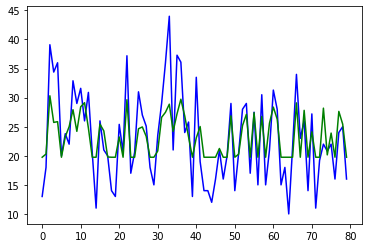

In [50]:
x= range(0,80)
plt.plot(x, y_test, c='blue') 
plt.plot(x, pred, color='g') 
plt.show()